In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [3]:
#read the encoded dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\cleaned_data.csv")
df.head(9)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,1,2,1,2,0,1,3,10,6.655000,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,2,4,1,4,0,1,4,4,5.123958,0
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,1,5,0,4,1,2,3,4,4.190609,0
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,2,1,1,0,1,4,0,9,7.467984,1
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,0,4,3,9,0.406585,0
5,1,25.0,39,2.0,5.70,3.0,2,0,12,0,...,3,5,0,4,1,4,2,7,4.207805,1
6,1,24.0,46,3.0,9.54,4.0,1,0,10,0,...,5,3,1,1,0,0,0,4,4.956508,0
7,0,24.0,6,2.0,8.04,4.0,2,3,11,0,...,5,1,1,4,1,2,2,8,9.909730,1
8,1,19.0,33,3.0,9.79,1.0,1,1,2,1,...,2,1,0,2,0,1,3,19,1.486374,1


In [4]:
X = df.drop(columns=["Depression"])  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [ ]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)


no thing to cluster
Cluster
0    27898
Name: count, dtype: int64


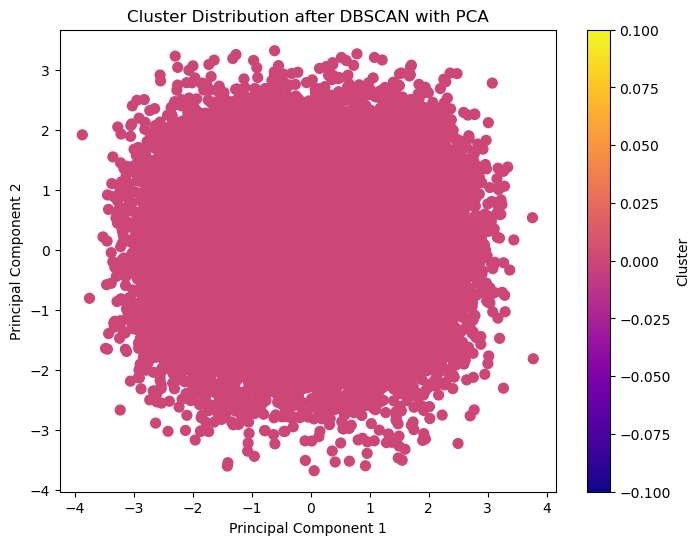

In [10]:

dbscan = DBSCAN(eps=2, min_samples=5)  
clusters = dbscan.fit_predict(X_pca)

valid_mask = clusters != -1
if len(set(clusters[valid_mask])) > 1:
    silhouette = silhouette_score(X_pca[valid_mask], clusters[valid_mask])
    print(f"Silhouette Score for DBSCAN with PCA: {silhouette}")
else:
    print("no thing to cluster")

X["Cluster"] = clusters


print(X["Cluster"].value_counts())


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='plasma', s=50)
plt.title("Cluster Distribution after DBSCAN with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


Silhouette Score for KMeans with PCA: 0.2789821185302457
Cluster
0    15624
1    12274
Name: count, dtype: int64


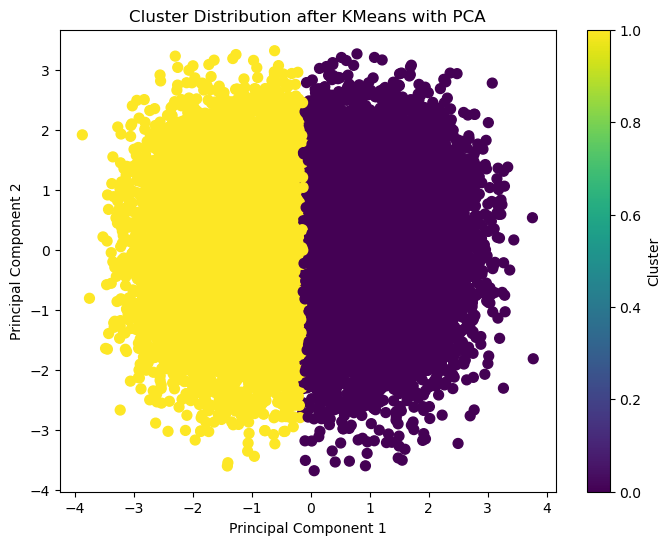

In [18]:
kmeans = KMeans(n_clusters=2, random_state=42)  
clusters = kmeans.fit_predict(X_pca)


silhouette = silhouette_score(X_pca, clusters)
print(f"Silhouette Score for KMeans with PCA: {silhouette}")


X["Cluster"] = clusters


print(X["Cluster"].value_counts())


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Cluster Distribution after KMeans with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [19]:
df["Cluster"] = clusters
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)


           Gender        Age       City  Academic Pressure      CGPA  \
Cluster                                                                
0        0.566116  21.023618  25.813684           3.786930  7.676394   
1        0.545951  21.048884  26.905654           2.319537  7.630403   

         Study Satisfaction  Sleep Duration  Dietary Habits    Degree  \
Cluster                                                                 
0                  2.658282        1.471902        1.752752  9.332821   
1                  3.307642        1.561920        1.100538  9.244175   

         Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
Cluster                                         ...                     
0                                     0.893433  ...          2.972158   
1                                     0.301206  ...          3.028597   

         Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
Cluster                                          

In [20]:
print(df.groupby("Cluster")["Depression"].value_counts(normalize=True))


Cluster  Depression
0        1             0.922171
         0             0.077829
1        0             0.605426
         1             0.394574
Name: proportion, dtype: float64
